In [2]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

/home/vmesle/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Courbes style TVAC test plan

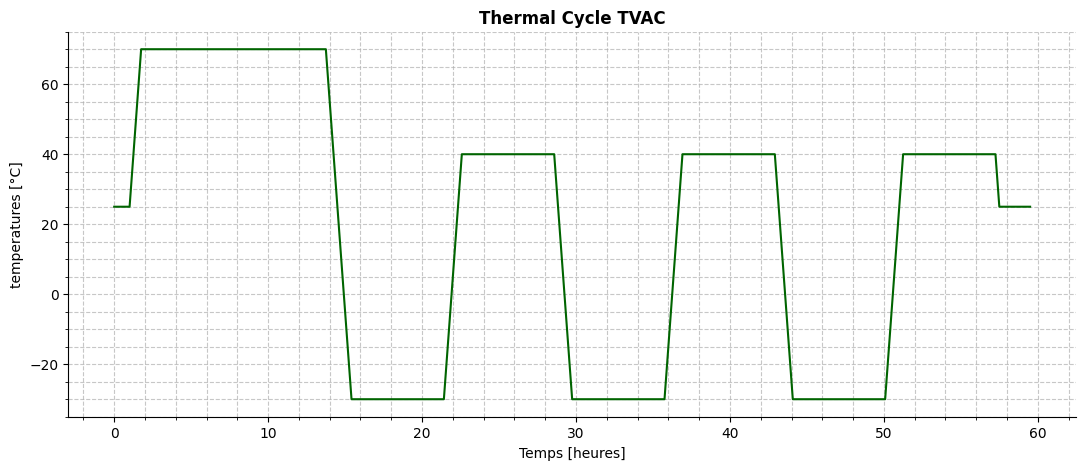

In [3]:
palier_durations_heures = [
    1, # first vacuum tests
    12, # bake out 
    6, # cold 1
    6, # hot 1
    6, # cold 2
    6, # hot 2
    6, # cold 3
    6, # hot 3
    2, #back to reallity
    2,
    ]

# Durée de chaque palier en minutes
palier_durations = [h*60 for h in palier_durations_heures]  # Durée de chaque palier en minutes

# Valeur de chaque palier
palier_values = [25,       # first vacuum tests    
                 70,       # bake out 
                 -30,      # cold 1
                 40,       # hot 1
                 -30,      # cold 2
                 40,       # hot 2
                 -30,      # cold 3
                 40,       # hot 3
                 25,       #back to reallity
                 25,
                 ]  # Niveaux de chaque palier

# Pente entre les paliers (unités par minute)
pentes = [1]*len(palier_durations[:-1])  # Pente pour atteindre le palier suivant

# Initialiser les données pour le DataFrame
times = []
values = []

# Point de départ
current_time = timedelta(minutes=0)

for i in range(len(palier_values) - 1):
    # Niveau actuel et suivant
    value = palier_values[i]
    next_value = palier_values[i + 1]
    
    # Ajouter le palier actuel
    times.append(current_time)
    values.append(value)
    
    # Avancer jusqu'à la fin du palier (point constant)
    current_time += timedelta(minutes=palier_durations[i])
    times.append(current_time)
    values.append(value)  # Maintenir la valeur du palier à la fin de la durée

    # Calcul de la durée de transition en fonction de la pente
    difference = next_value - value
    transition_duration = abs(difference / pentes[i])  # Temps pour atteindre le prochain palier en minutes
    num_steps = int(transition_duration)  # Nombre de points intermédiaires dans la transition
    
    # Ajouter les points intermédiaires pour la transition
    for step in range(1, num_steps + 1):
        current_time += timedelta(minutes=1)  # Intervalle de 1 minute entre chaque point de transition
        times.append(current_time)
        interpolated_value = value + pentes[i] * step * (1 if difference > 0 else -1)
        values.append(interpolated_value)

# Ajouter le dernier palier sans transition
times.append(current_time)
values.append(palier_values[-1])

# Créer le DataFrame avec les times en index et values comme niveaux
df = pd.DataFrame(values, index=pd.to_timedelta(times), columns=['niveau'])

# Tracer les données avec matplotlib sans pandas
time_values = (df.index.total_seconds() / 3600 ).values # Conversion en heures
niveau_values = df['niveau'].tolist()

# Créer le graphique
plt.figure(figsize=(13, 5))
plt.plot(time_values, niveau_values, c='darkgreen', linestyle='-') #, marker='o'


# Ajouter des labels et un titre
plt.title("Thermal Cycle TVAC", fontweight="bold")
plt.xlabel("Temps [heures]")
plt.ylabel("temperatures [°C]")


# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.savefig('/home/virgil/Downloads/S-BAND/S-BAND TVAC/courbes/TVAC_cycles.png', facecolor = 'white' ,bbox_inches='tight')

plt.show()


## Camenbers

In [4]:
dic = {
    'S&M': 3.84, 
    'TCS': 0.12,
    'ADCS': 1.89,
    'EPS': 3.01,
    'OBDH': 0.05,
    'TT&C': 0.95,
    'PL-AURICAM' : 0.61,
    'PL-IRIS 50' : 0.46,
    'PL- NOXCAM' : 1.44,
    }
data = pd.Series(dic)

In [11]:

# Exemple de DataFrame
df = pd.DataFrame({
    'Titre1': ['PF', 'PF', 'PF', 'PF', 'PF', 'PF','PL', 'PL', 'PL'],
    'Titre2': ['S&M', 'TCS', 'ADCS', 'EPS', 'OBDH', 'TT&C', 'AURICAM', 'RIS 50', 'NOXCAM'],
    'Valeur': [3.84, 0.12, 1.89, 3.01, 0.05, 0.95, 0.61, 0.46, 1.44]
})

# Sunburst automatique avec Plotly Express
fig = px.sunburst(
    df,
    path=['Titre1', 'Titre2'],  # Définir la hiérarchie
    values='Valeur',
)

# Personnalisation du fond et des textes
fig.update_traces(
    # insidetextorientation='radial',
    textinfo='label+value'
)
fig.update_layout(
    margin=dict(t=0, l=0, r=0, b=0),
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.update_traces(textfont_size=20,
                  marker=dict(line=dict(color='#FFFFFF', width=2)))
fig.show()


In [6]:
title = 'Data Rate and Capacity'
data_rate = [9600,100E+05,100E+06]
data_capacity_one_overpass = [720,7500,75000]
data_capacity_max_a_day = [i*4 for i in data_capacity_one_overpass]

In [7]:
def regrpoly(x,y,d=1,R2=False):
    """
    retourne un object polynome correspondant à la regression polynomiale de degrès d des séries y, x 
    """
    f=np.poly1d(np.polyfit(x, y, d))
    if R2==True:
        Yreg=[]
        for i in x:
            Yreg.append(f(i))
    return(f)

In [8]:
x = np.linspace(min(data_rate), max(data_rate), 100)
f = regrpoly(data_rate, data_capacity_one_overpass, 2)
f2 = regrpoly(data_rate, data_capacity_max_a_day, 2)

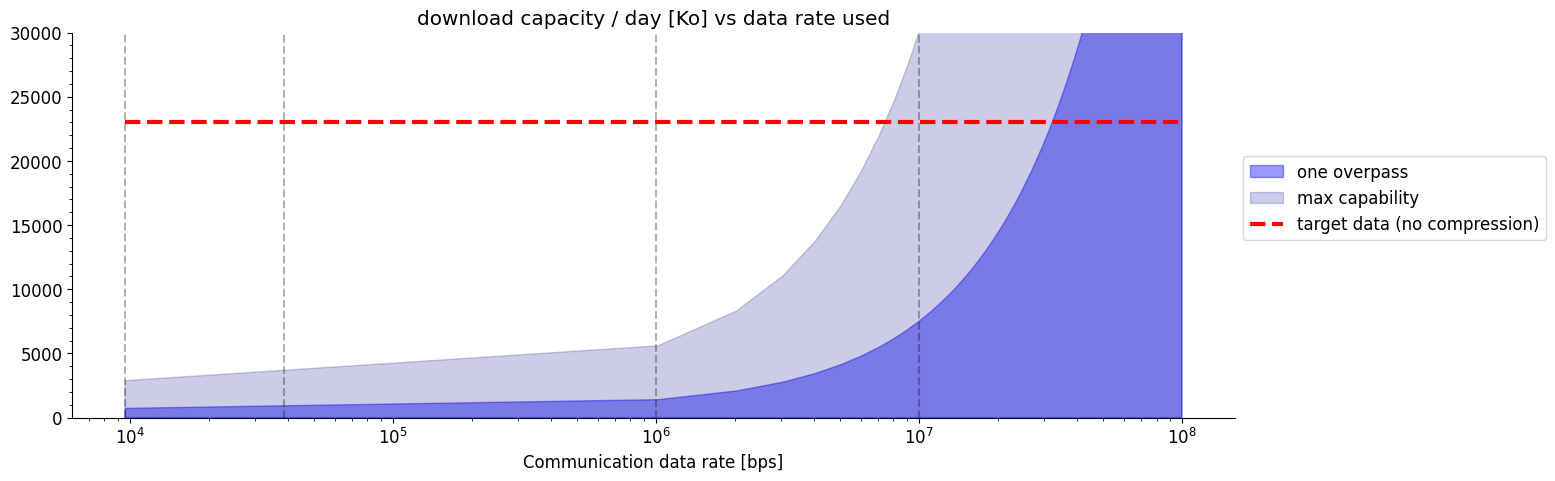

In [9]:
plt.rcParams["figure.figsize"] = [15,5]
plt.rcParams['font.size'] = '12'
# PLOT

lims = [0, 3e4]
nb_data = 23e3

# plt.plot(data_rate, data_capacity_one_overpass, c='blue', ls='--', )
# plt.plot(data_rate, data_capacity_max_a_day, c='darkblue', ls = '--', label = 'every pass')

plt.vlines([9600, 38600, 1e6, 10e6], ymin= lims[0], ymax=lims[1], ls = '--', color='k', alpha=0.3)
plt.fill_between(x, 0, f(x), alpha=0.4, interpolate=True, color='b', label='one overpass')
plt.fill_between(x, 0, f2(x), alpha=0.2, interpolate=True, color='darkblue', label ='max capability')
# plt.fill_between(data_rate, [nb_data]*len(data_rate), [nb_data+1e3]*len(data_rate), color='red')
plt.plot(x, [nb_data]*len(x), '--r', lw=3, label = 'target data (no compression)')

# LEGEND
plt.legend(bbox_to_anchor=(1, 0.5, 0.3, 0.2), loc='upper left')
# plt.legend(loc = 'best',ncol = 1)

plt.title(title, fontweight="bold")

# LABELS
# plt.ylabel('')
plt.xlabel('Communication data rate [bps]')

# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(False, which='both') 
plt.xscale('log')
# plt.yscale('log')

plt.gca().spines[['right', 'top']].set_visible(False)
# plt.grid(alpha=0.5, linestyle=':')

plt.ylim(lims)
plt.title("download capacity / day [Ko] vs data rate used")
plt.show()